# Project No. 2 – Logistic Regression from Scratch

**Author:** Idris Benseghir  
**Date:** December  2025  
**Dataset:** `Titanic_dataset.csv`
---

This notebook presents a complete implementation of **Logistic Regression from scratch** using only **NumPy** and **Pandas**, followed by a comparison with **scikit-learn’s `LogisticRegression`** for validation.

---

***Overview:***

In this project, we manually build a binary classification model and walk through every key step of the learning process, including:
- Implementing the **sigmoid function**
- Computing predictions using a linear combination of features
- Training the model using gradient descent
- Minimizing binary cross-entropy (log loss)
- Generating class predictions using a decision threshold

***Evaluation:***

Model performance is evaluated using a confusion matrix, from which the following metrics are computed manually:

Accuracy

Precision

Recall

F1 Score

The same metrics are then computed using scikit-learn to verify correctness.

---

**Goal:** Understand *how* linear regression works — not just *that* it works.

Let’s begin!

## Part 1 - Data Importing, Preprocessing & Train-Test Split

### Step 0 – Import Libraries
Loaded essential libraries for data handling (`pandas`, `numpy`), plotting (`matplotlib`), preprocessing (`OrdinalEncoder`), and train-test splitting (`sklearn`).

### Step 1 – Load Dataset
Read the CSV dataset into a DataFrame and previewed the first few rows.

### Step 2 – Exploratory Data Analysis (EDA)
- Checked summary statistics (`describe()`) to understand distributions.
- Verified dataset shape and identified missing values.
- Checked column types and non-null counts (`info()`).

### Step 3 – Handle Missing Values
- Filled missing `Age` values using the median by `Sex` and `Pclass`.
- Dropped `Cabin` due to too many missing values.
- Filled missing `Embarked` values using mode within each `Pclass`.

### Step 4 – Handle Categorical Variables
- Identified categorical columns (`object`/`category`).
- Encoded `Sex` with `OrdinalEncoder`.
- Encoded `Embarked` with manual mapping.

### Step 5 – Save Cleaned Dataset
- Selected relevant columns.
- Saved cleaned data to a new CSV (`Titanic_dataset_cleaned.csv`) for reuse.

### Step 6 – Feature Standardization
- Defined features (`Pclass, Sex, Age, Fare, Embarked`) and target (`Survived`).
- Calculated mean and standard deviation for each feature manually .
- Standardized all features using `(value - mean) / std`.

### Step 7 – Train-Test Split
- Split data into training and testing sets (**80%-20%**) for model training.


In [1]:
# Step 0: Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
# Step 1: Dataset Loading

file_path = 'Titanic_dataset.csv'
data = pd.read_csv(file_path)
print("Original Dataset:")
data.head()

Original Dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Step 2: Exploratory Data Analysis (EDA)

# 2a - Statistical Summary
print("Statistical Summary:")
display(data.describe())

# 2b - Dataset Dimensions
print(f"Dataset Shape: {data.shape[0]} rows, {data.shape[1]} columns")
print()

# 2c - Missing Values Inspection
print("Missing Values:")
print(data.isnull().sum())
print()

# Quick overview of dataset types & non-null counts (one step)
data.info()

Statistical Summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Dataset Shape: 891 rows, 12 columns

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: floa

In [4]:
# Step 3: Data Preprocessing - Handling Missing Values

# 3a - Age Column Handling 
data['Age'] = data.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# 3b - Cabin Column Handling 
data = data.drop('Cabin', axis=1)

# 3c - Embarked Column Handling 
data['Embarked'] = data.groupby('Pclass')['Embarked'].transform(lambda x: x.fillna(x.mode()[0]))

In [5]:
# Step 4: Data Preprocessing - Handling Categorical Variables

# 4a - Identifying Categorical Variables
display(data.info()) #  # Entries with the Dtype = 'object' or 'category' are Categorical columns that needs to be encoded 
print()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)
print()

# 4b - Sex Column Handling 
encoder = OrdinalEncoder()
data['Sex'] = encoder.fit_transform(data[['Sex']])

# 4c - Embarked Column Handling 
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
print()
print("Encoded Data:")
display(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


None


Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


Encoded Data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,2


In [6]:
# Step 5: Cleaned Dataset

# 5a - Save Cleaned Dataset
columns_to_keep = ["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]
data[columns_to_keep].to_csv("Titanic_dataset_cleaned.csv", index=False)

# 5b - Load Cleaned Dataset
c_data = pd.read_csv("Titanic_dataset_cleaned.csv")
print("Cleaned Dataset Preview:")
display(c_data.head())

Cleaned Dataset Preview:


,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1.0,22.0,7.2500,2
1,1,1,0.0,38.0,71.2833,0
2,1,3,0.0,26.0,7.9250,2
3,1,1,0.0,35.0,53.1000,2
4,0,3,1.0,35.0,8.0500,2


In [7]:
# Step 6: Feature Standardization

# 6a - Define Features and Target
target = c_data["Survived"]
features_selected = ["Pclass", "Sex", "Age", "Fare", "Embarked"]
feature = c_data[features_selected]

# 6b - Calculate Mean and Std for Standardization
# Feature 1: Pclass
f1_mean = feature["Pclass"].mean()
f1_std = feature["Pclass"].std()
print("Pclass Mean:", f1_mean)
print("Pclass Std:", f1_std)
print()

# Feature 2: Sex
f2_mean = feature["Sex"].mean()
f2_std = feature["Sex"].std()
print("Sex Mean:", f2_mean)
print("Sex Std:", f2_std)
print()

# Feature 3: Age
f3_mean = feature["Age"].mean()
f3_std = feature["Age"].std()
print("Age Mean:", f3_mean)
print("Age Std:", f3_std)
print()

# Feature 4: Fare
f4_mean = feature["Fare"].mean()
f4_std = feature["Fare"].std()
print("Fare Mean:", f4_mean)
print("Fare Std:", f4_std)
print()

# Feature 5: Embarked
f5_mean = feature["Embarked"].mean()
f5_std = feature["Embarked"].std()
print("Embarked Mean:", f5_mean)
print("Embarked Std:", f5_std)
print()

# 6c - Standardize Features
x = feature.copy()  # avoid modifying the original

x["Pclass"]   = (feature["Pclass"]   - f1_mean) / f1_std
x["Sex"]      = (feature["Sex"]      - f2_mean) / f2_std
x["Age"]      = (feature["Age"]      - f3_mean) / f3_std
x["Fare"]     = (feature["Fare"]     - f4_mean) / f4_std
x["Embarked"] = (feature["Embarked"] - f5_mean) / f5_std

print("Standardized Features Preview:")
display(x.head())

Pclass Mean: 2.308641975308642
Pclass Std: 0.8360712409770513

Sex Mean: 0.6475869809203143
Sex Std: 0.47799007089609846

Age Mean: 29.11242424242424
Age Std: 13.304424074688153

Fare Mean: 32.204207968574636
Fare Std: 49.693428597180905

Embarked Mean: 1.5364758698092031
Embarked Std: 0.7915030036292732

Standardized Features Preview:


,Pclass,Sex,Age,Fare,Embarked
0,0.826913,0.737281,-0.534591,-0.502163,0.585625
1,-1.565228,-1.354813,0.668017,0.786404,-1.941213
2,0.826913,-1.354813,-0.233939,-0.488580,0.585625
3,-1.565228,-1.354813,0.442528,0.420494,0.585625
4,0.826913,0.737281,0.442528,-0.486064,0.585625


In [8]:
# Step 7: Train-Test Split

feature_train, feature_test, target_train, target_test = train_test_split(
    x, target, test_size=0.2, random_state=0
)
# Reindexing for Train set
feature_train = feature_train.reset_index(drop=True)
target_train = target_train.reset_index(drop=True)

# Reindexing for test set
x_test = feature_test.reset_index(drop=True)
y_test = target_test.reset_index(drop=True)

print(feature_train.count())
print(target_train.count())
print(x_test.count())
print(y_test.count())

print("Training Features Preview:")
display(feature_train.head())
print()

print("Testing Features Preview:")
display(feature_test.head())
print()

Pclass      712
Sex         712
Age         712
Fare        712
Embarked    712
dtype: int64
712
Pclass      179
Sex         179
Age         179
Fare        179
Embarked    179
dtype: int64
179
Training Features Preview:


,Pclass,Sex,Age,Fare,Embarked
0,0.826913,-1.354813,-0.572172,-0.341261,-1.941213
1,-0.369158,0.737281,0.141876,-0.436762,0.585625
2,-0.369158,0.737281,0.141876,0.096592,-1.941213
3,0.826913,0.737281,-0.684917,-0.567313,-1.941213
4,0.826913,0.737281,-0.609754,-0.502163,0.585625



Testing Features Preview:


,Pclass,Sex,Age,Fare,Embarked
495,0.826913,0.737281,-0.309102,-0.357108,-1.941213
648,0.826913,0.737281,-0.309102,-0.496126,0.585625
278,0.826913,0.737281,-1.662035,-0.061964,-0.677794
31,-1.565228,-1.354813,0.442528,2.300437,-1.941213
255,0.826913,-1.354813,-0.008450,-0.341261,-1.941213


## Part 2: Logistic Regression Model (From Scratch)

### Step 1 – Initialize Parameters
- Set initial weights (`w1...w5`) to zero.
- Set initial bias (`b`) to zero.
- Define learning rate and number of epochs.

### Step 2 – Forward Pass (Linear + Sigmoid)
- Compute the linear combination:  
  `z = w1*x1 + w2*x2 + ... + w5*x5 + b`
- Apply the sigmoid activation to get predictions.

### Step 3 – Compute Gradients
- Calculate the error between prediction and actual label.
- Compute gradients for each weight and bias.

### Step 4 – Update Weights & Bias
- Update parameters using gradient descent:  
  `w = w - lr * gradient`  
  `b = b - lr * gradient_b`

### Step 5 – Repeat for All Samples
- Perform steps 2–4 for every training row in the dataset.

### Step 6 – Repeat for All Epochs
- Loop through the entire training set multiple times (epochs)  
  to minimize loss and improve accuracy.

### Step 7 – Model Testing
- Apply learned parameters to test data.
- Generate predictions using sigmoid thresholding (0.5).

### Step 8 – Evaluate Performance
- Calculate accuracy, precision, recall, and F1-score.
- Build a confusion matrix to compare predictions vs actual labels.


In [9]:
# Phase I: Model Training 
# Step 1: Batch Gradient Descent 

# 1a - Initialize Values (weights & bias & Learning rate ...)
w = [0, 0, 0, 0, 0]  # one weight per feature
b = 0
lr = 0.1
m = target_train.count()
epochs = 10
print("Total training samples =", m)

# Training Starts
for e in range(epochs):
    
    # 1b — Initialize accumulated gradients 
    w_grad_sum = [0, 0, 0, 0, 0]
    b_grad_sum = 0

    for i in range(m):
        
        # Step 2: Forward Pass: Compute linear combination
        z = (w[0]*feature_train["Pclass"][i] +
             w[1]*feature_train["Sex"][i] +
             w[2]*feature_train["Age"][i] +
             w[3]*feature_train["Fare"][i] +
             w[4]*feature_train["Embarked"][i] +
             b)

        
        # Step 3: Sigmoid Function
        y_pred = 1 / (1 + np.exp(-z))
        
        # Step 4: Compute Gradients
        wg = [
            (y_pred - target_train[i]) * feature_train["Pclass"][i],
            (y_pred - target_train[i]) * feature_train["Sex"][i],
            (y_pred - target_train[i]) * feature_train["Age"][i],
            (y_pred - target_train[i]) * feature_train["Fare"][i],
            (y_pred - target_train[i]) * feature_train["Embarked"][i],
        ]
    
        # Step 5: Accumulate Gradients
        for j in range(5):
            w_grad_sum[j] += wg[j]
        b_grad_sum += (y_pred - target_train[i])

    # Step 6: Compute Average Gradient
    for j in range(5):
        w_grad_sum[j] /= m
    b_grad_sum /= m

    # Step 7: Update Weights & Bias
    for j in range(5):
        w[j] -= lr * w_grad_sum[j]
    b -= lr * b_grad_sum
    
    # Print Epoch Summary
    print("Epoch No." +str(e) +" -----------------------------------------------------")
    for i in range(5):
        print("Updated weight for feature", features_selected[i], ":", w[i])
    print("Updated bias:", b)
    print()

Total training samples = 712
Epoch No.0 -----------------------------------------------------
Updated weight for feature Pclass : -0.015351145334854927
Updated weight for feature Sex : -0.026371628311924994
Updated weight for feature Age : -0.004253451113781686
Updated weight for feature Fare : 0.011338227988161689
Updated weight for feature Embarked : -0.007181703993104487
Updated bias: -0.011657303370786517

Epoch No.1 -----------------------------------------------------
Updated weight for feature Pclass : -0.030101524295977317
Updated weight for feature Sex : -0.05195844661603483
Updated weight for feature Age : -0.008521816208496513
Updated weight for feature Fare : 0.022049571085903816
Updated weight for feature Embarked : -0.014005333227989447
Updated bias: -0.02300732876022968

Epoch No.2 -----------------------------------------------------
Updated weight for feature Pclass : -0.044279646625233135
Updated weight for feature Sex : -0.07678650301965351
Updated weight for feature

In [10]:
# Phase II: Model Testing 

# Step 1: Initialize prediction list
pred = []
n = y_test.count()
print("Number of test samples:", n)

# Testing Starts
for i in range(n):
    
    # Step 2: Forward Pass: Compute linear combination
    z = (w[0]*x_test["Pclass"][i] +
         w[1]*x_test["Sex"][i] +
         w[2]*x_test["Age"][i] +
         w[3]*x_test["Fare"][i] +
         w[4]*x_test["Embarked"][i] +
             b)
    # Step 3: Sigmoid Function 
    y_pred = 1 / (1 + np.exp(-z))
    
    # Step 4: Probability Convertion 
    if y_pred > 0.5:
        pred.append(1)   # Survived 
    else:
        pred.append(0)   # Not Survived

Number of test samples: 179


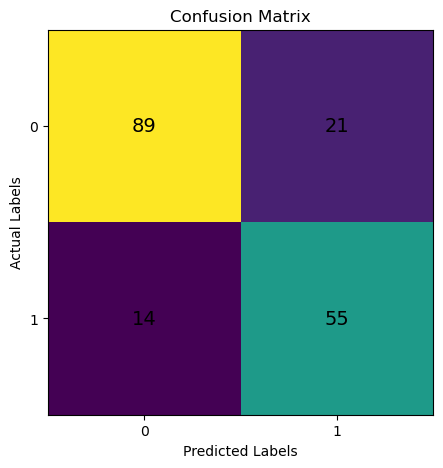

True Positive: 55
True Negative: 89
False Positive: 21
False Negative: 14

Accuracy is:  83.72093023255815 %
Precision: 72.36842105263158 %
Recall: 79.71014492753623 %
F1 Score: 75.86206896551724 %


In [11]:
# Phase III: Model Evaluation

# Step 1: Initialize confusion matrix values
tp = tn = fp = fn = 0

# Step 2: Build confusion matrix
for i in range(n):
    if y_test[i] == 1 and pred[i] == 1:
        tp += 1
    elif y_test[i] == 0 and pred[i] == 0:
        tn += 1
    elif y_test[i] == 0 and pred[i] == 1:
        fp += 1
    elif y_test[i] == 1 and pred[i] == 0:
        fn += 1
# Build confusion matrix from your computed values
cm = np.array([
    [tn, fp],
    [fn, tp]
])

# Plot confusion matrix
plt.figure(figsize=(6, 5))
plt.imshow(cm)

# Add text annotations
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=14)

# Labels & titles
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])

plt.show()
# Print confusion matrix values
print("True Positive:", tp)
print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print()


# Step 3: Compute evaluation metrics
# Accuracy
acc = (tp + tn )/ (tp + fn + tn + fn )
print("Accuracy is: ", acc * 100, "%" )

# Precision
precision = tp / (tp + fp)
print("Precision:", precision * 100, "%")

# Recall
recall = tp / (tp + fn)
print("Recall:", recall * 100, "%")

# F1 Score
f1_score = (2 * precision * recall) / (precision + recall)
f1_manual = f1_score
print("F1 Score:", f1_score * 100, "%")

## Part 2: Logistic Regression Model Using Sk_learn


Accuracy : 0.7988826815642458
Precision: 0.746268656716418
Recall   : 0.7246376811594203
F1-Score : 0.7352941176470589


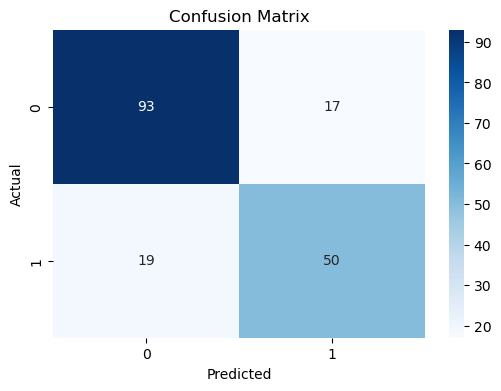

In [12]:
# Step 1: Model Initilizing 
model = LogisticRegression()

# Step 2: Model Training / Fitting
model.fit(feature_train, target_train)

# Step 3: Predict on the test set
sk_y_pred = model.predict(x_test)

# Step 4: Confusion Matrix
from sklearn.metrics import confusion_matrix
sk_cm = confusion_matrix(y_test, sk_y_pred)

# Step 5: Accuracy, Precision, Recall, F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

sk_accuracy = accuracy_score(y_test, sk_y_pred)
sk_precision = precision_score(y_test, sk_y_pred)
sk_recall = recall_score(y_test, sk_y_pred)
sk_f1 = f1_score(y_test, sk_y_pred)

print("Accuracy :", sk_accuracy)
print("Precision:", sk_precision)
print("Recall   :", sk_recall)
print("F1-Score :", sk_f1)

# Step 6: Plot Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(sk_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Part 4 - Results Comparison & Analysis

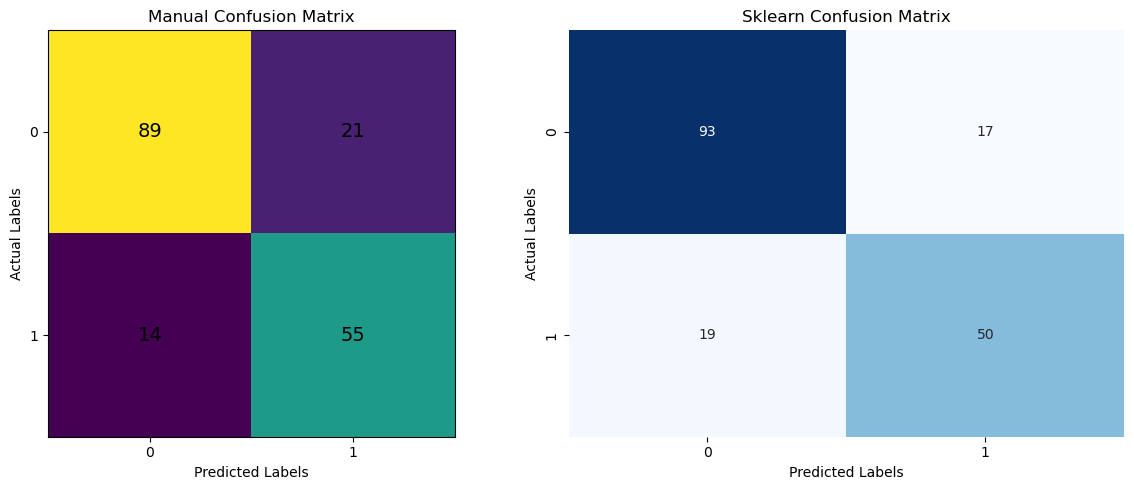

In [13]:
# Step 1: Compare manual(from scratch) vs sklearn(predefined) - Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# 1a — Manual Confusion Matrix
plt.subplot(1, 2, 1)
plt.imshow(cm)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center", fontsize=14)

plt.title("Manual Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])

# 1b — Sklearn Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(sk_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title("Sklearn Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

plt.tight_layout()
plt.show()

In [14]:
# Step 2: Compare manual(from scratch) vs sklearn(predefined) - Accuracy, Precision, Recall, F1 Metrics

metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Manual (%)": [
        acc * 100,
        precision * 100,
        recall * 100,
        f1_manual *100
    ],
    "Sklearn (%)": [
        sk_accuracy * 100,
        sk_precision * 100,
        sk_recall * 100,
        sk_f1 * 100
    ]
})

print(metrics_df.round(2))


      Metric  Manual (%)  Sklearn (%)
0   Accuracy       83.72        79.89
1  Precision       72.37        74.63
2     Recall       79.71        72.46
3   F1 Score       75.86        73.53


In [15]:
# Step 3: Summary 
if acc > sk_accuracy:
    print("Manual implementation performs better than sklearn.")
elif acc < sk_accuracy:
    print("Sklearn implementation performs better than the manual version.")
else:
    print("Both implementations perform equally well.")


Manual implementation performs better than sklearn.
